In [1]:
import qiskit
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import QFT
import numpy as np
from numpy import pi

In [2]:
n_qubits = 4
x = 1 / 4

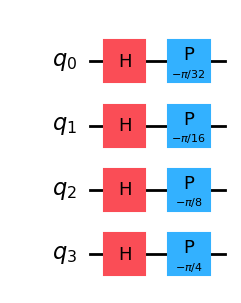

In [3]:

# Initialize quantum circuit
circ = qiskit.QuantumCircuit(n_qubits)

for qubit in range(n_qubits):
    circ.h(qubit)

circ.p(-2*pi*1/4*1/2,3)
circ.p(-2*pi*1/4*1/4,2)
circ.p(-2*pi*1/4*1/8,1)
circ.p(-2*pi*1/4*1/16,0)

circ.draw(output='mpl')

to check if that implementation is indeed correct, I use qiskit's `initialize()` function 

In [4]:
# 
def get_amp(x,k):
    return 1/np.sqrt(2**4)*np.exp(-1j*2*np.pi*x*k/16)

amps = [get_amp(1/4,k) for k in range(0,16)]
circSOL = qiskit.QuantumCircuit(4)
circSOL.initialize(amps)


And check use the statevecktors

In [5]:
svSOL = Statevector.from_instruction(circSOL)
sv = Statevector.from_instruction(circ)
sv==svSOL

True

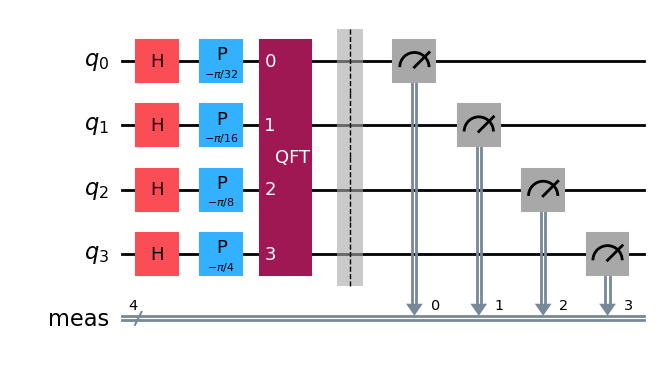

In [6]:
circ.append(QFT(4),range(4))
circ.measure_all()
circ.draw('mpl')

In [7]:
simulator = AerSimulator()
circ = qiskit.transpile(circ, simulator)
result = simulator.run(circ,shots=100000).result()

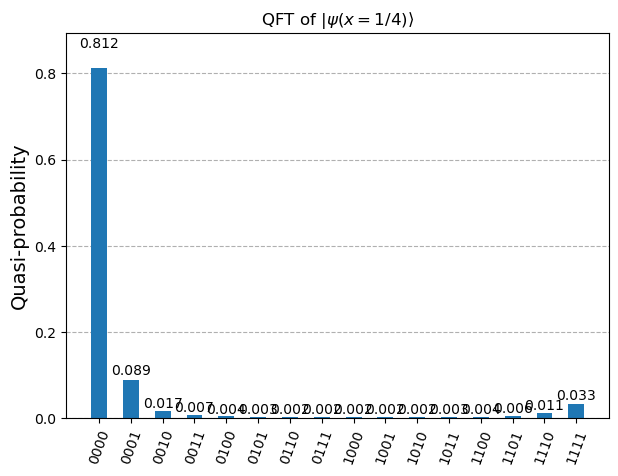

In [8]:
counts = result.get_counts(0)
qiskit.visualization.plot_distribution(counts, title=r"QFT of $| \psi(x=1/4)\rangle$")